# **Used Cars Price Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the used cars market has continued to grow over the past few years and is now larger than the new car market.

 Unlike the new cars, where price and supply are fairly deterministic and managed by orginal equipment manufacturer, except for dealership level, the used car market is a very different with large uncertainties in both pricing and supply.  Several factors such as mileage, brand, model, year, etc, can influence the actual worth of a car. From the perspectives of a seller, it is not an easy tast to set the correct price of used cars. With this fact, the pricing used cars become critical for the growing market.

### **The objective:**

 - What is the intended goal? The goal is predicting a right price of used cars and helping business in profitable strategies and differential pricing.

### **The key questions:**

- What are the key questions that need to be answered?

which model(s) is(are) the best for predicting used car prices?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
Which attributes are 1) positive to increase sales price for profitable margin and; 2) negatives to decrease used car values and, finally; 3) interesting attributes that sellers can hedge risks in the market.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Capstone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques.

### **Loading libraries**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MIT Applied DS/MIT Applied DS_Project/Capstone Project- Used car sale price/used_cars.csv")

### **Understand the data by observing a few rows**

In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:
The first 5 head data of the dataset have all data except a few price.  The last 5 data don't have values in terms of new price and price.

### **Let us check the data types and and missing values of each column**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights: There are 7253 non-null values and 14 columns. This indicates that there are no missing data in this dataset. Mileage, Engine, Power, Seats, New_price,Price are numeric values while the rest are object values.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [ ]:
# Remove S.No. column from data. Hint: Use inplace = True
data = data.drop (["S.No."],axis=1)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights:
-On average there are at least 5 seats availble used cars.
-The miniumum seats are 2 and the maximum seats are 5.
-The youngest used cars in this dataset were built in 1996 and the oldest cars are this dataset were built in 2016.
-The average of the year of the dataset is 2013.
-The average mileage of this dataset is 18.141580 and the minimum value is zero.
-The average engine size is 1616.57.
-There is not enough information regarding New_price, and that's the dependent variable to find.
-There might be outliers in Engine, Power, New_price, Price

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object']


**Number of unique observations in each category**

In [ ]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:

    print("For column:", column)

    print(data[column].value_counts(1))

    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  0.007583
Maruti Swift VDI                        0.006756
Maruti Swift Dzire VDI                  0.005791
Honda City 1.5 S MT                     0.005377
Maruti Swift VDI BSIV                   0.005101
                                          ...   
Chevrolet Beat LT Option                0.000138
Skoda Rapid 1.6 MPI AT Elegance Plus    0.000138
Ford EcoSport 1.5 TDCi Ambiente         0.000138
Hyundai i10 Magna 1.1 iTech SE          0.000138
Hyundai Elite i20 Magna Plus            0.000138
Name: Name, Length: 2041, dtype: float64
--------------------------------------------------
For column: Location
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64
-----------------------------------------------

#### **Observations and Insights: 10 Model names, 11 Location, 5 Fuel_type, 2 Transmission, 4owner_Type have unique values.

**Think About It**:

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven?
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [ ]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by="Kilometers_Driven", ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [ ]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(index=2328, inplace=True)

**Check Mileage extreme values**

In [ ]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by="Mileage").head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

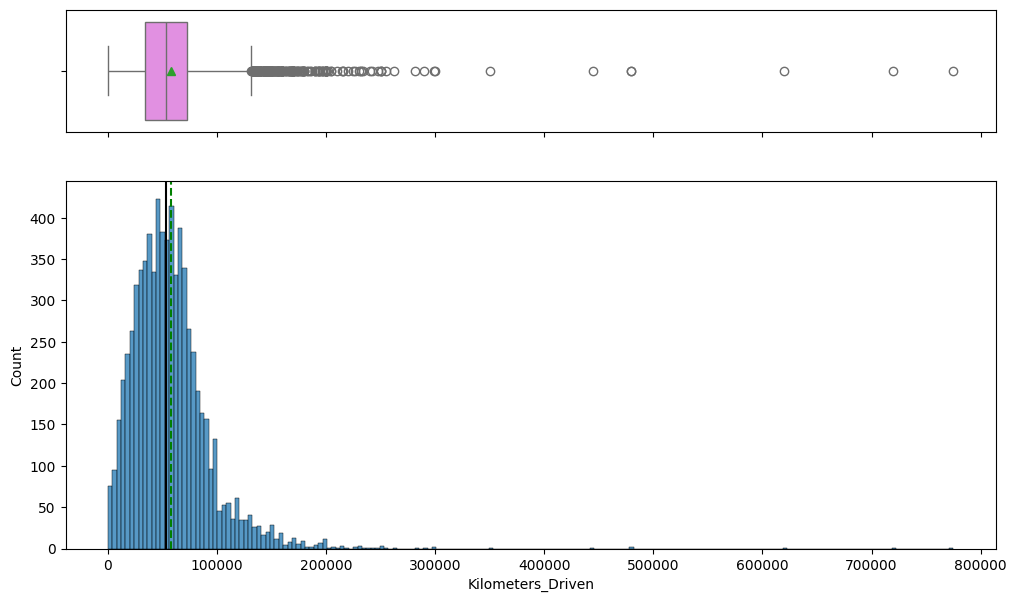

In [ ]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data, 'Kilometers_Driven')

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?
Yes. Using a Log transformation on skewed data is a common technique to redue or remove skewness. Skewness refers to the lack of symmetry in a distribution, where one tail is longer than the other. Log transformation is effective in reducing because it compresses large values more than small values effectively strechting out the lower end of the disribution while compressing the higher end.

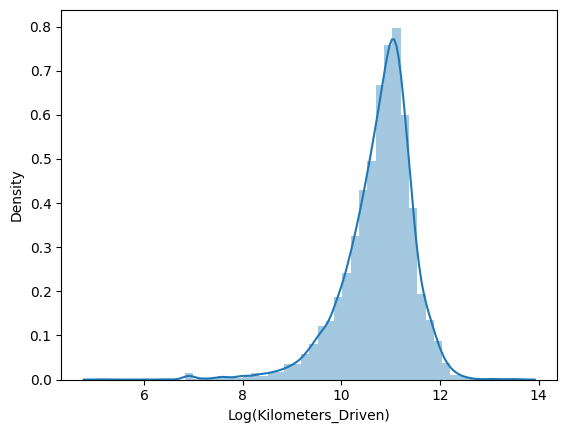

In [ ]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: The Log transformed graph seems to be better looking (normal distribution) than the previous one.

In [ ]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

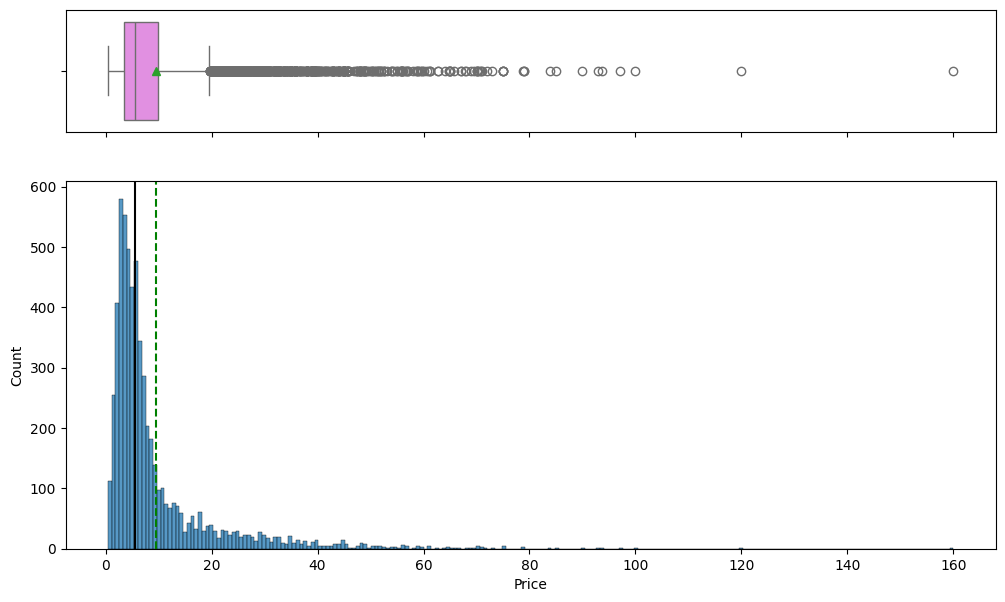

In [ ]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data, 'Price')

In [ ]:
# Log transformation of the feature 'Price'
data["Price_log"] = np.log(data["Price"])

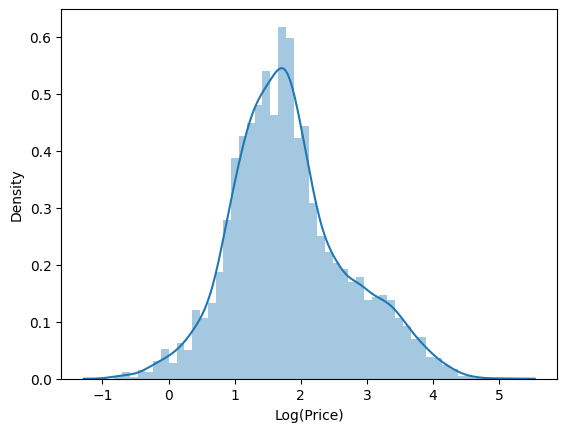

In [ ]:
# We can Add a transformed Price feature in data
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

**Observations and Insights for all the plots:

The Price graph is right skewed (mean>median>mode). However, after the log transformation, the graph seems to be normal distribution, which is better for us to read the data.




## **2. Univariate analysis - Categorical Data**

In [ ]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.


def perc_on_bar(data, z):
    '''
    plot
    data: DataFrame or Series
    z: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])  # Length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot

        ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage with center alignment

    plt.show()

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

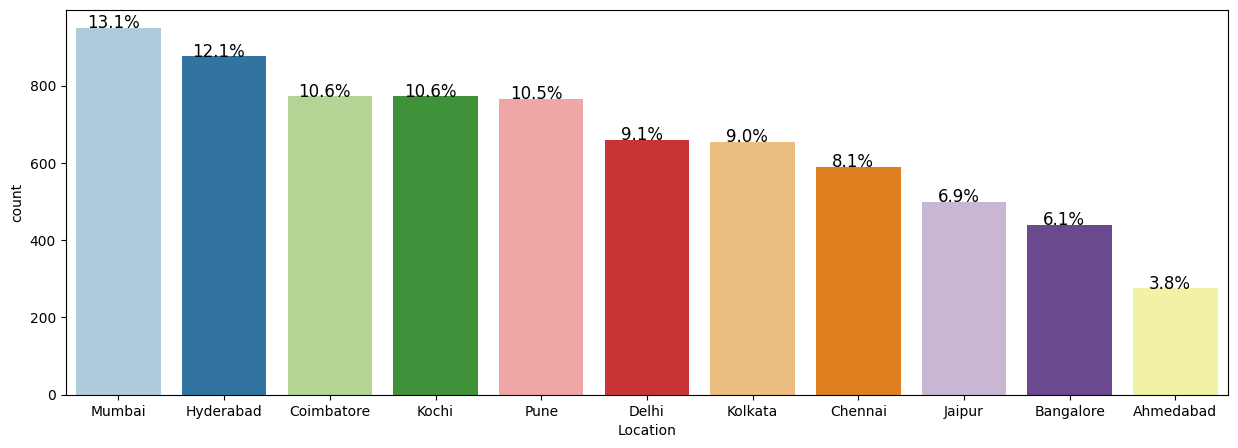

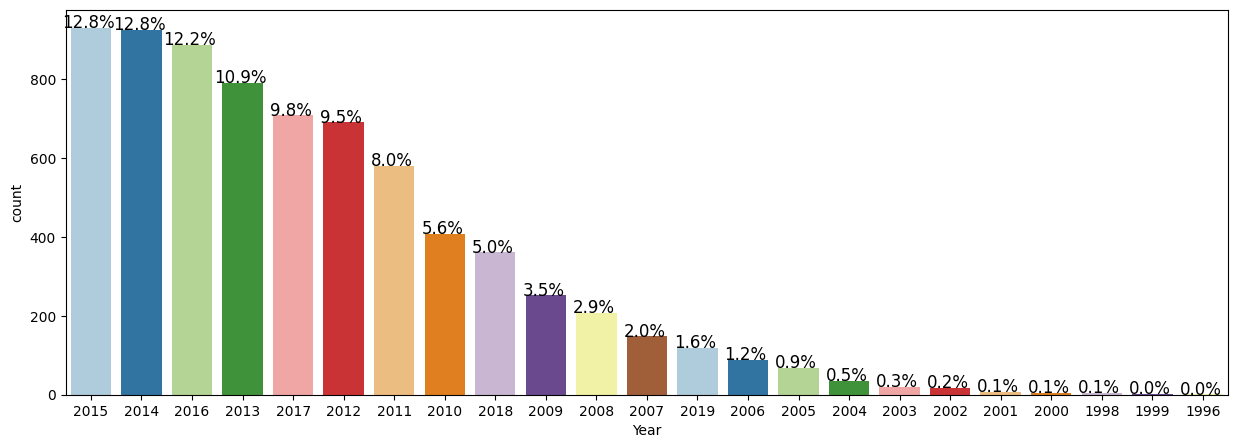

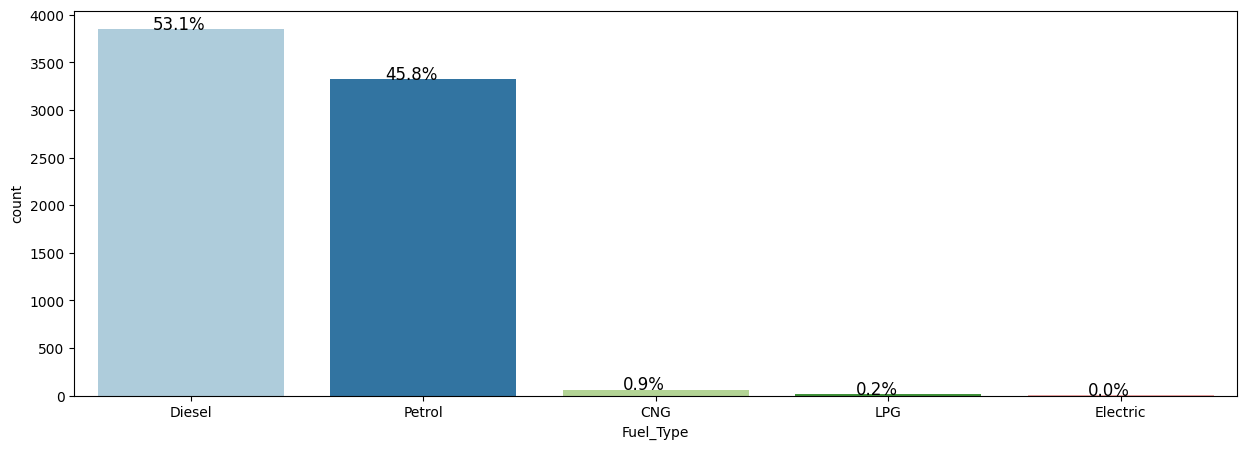

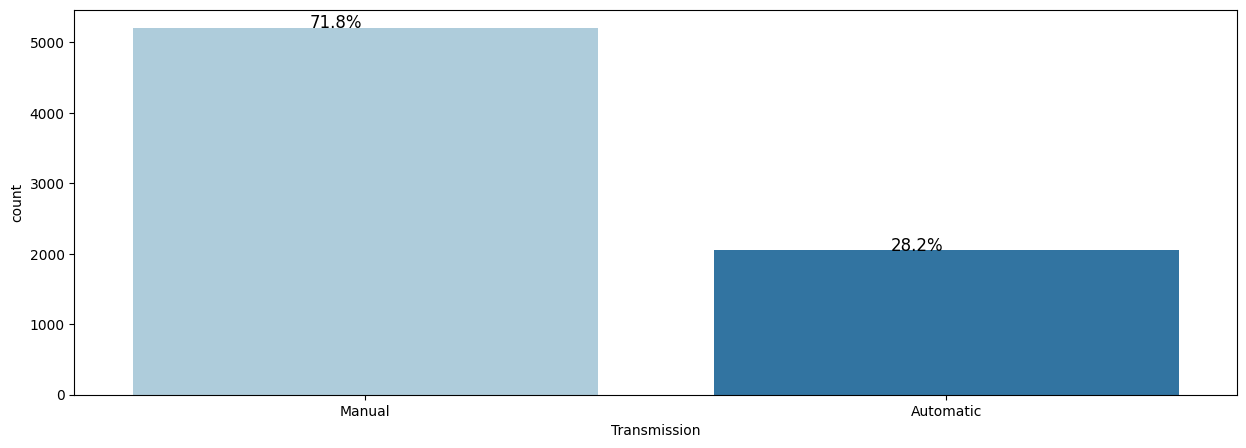

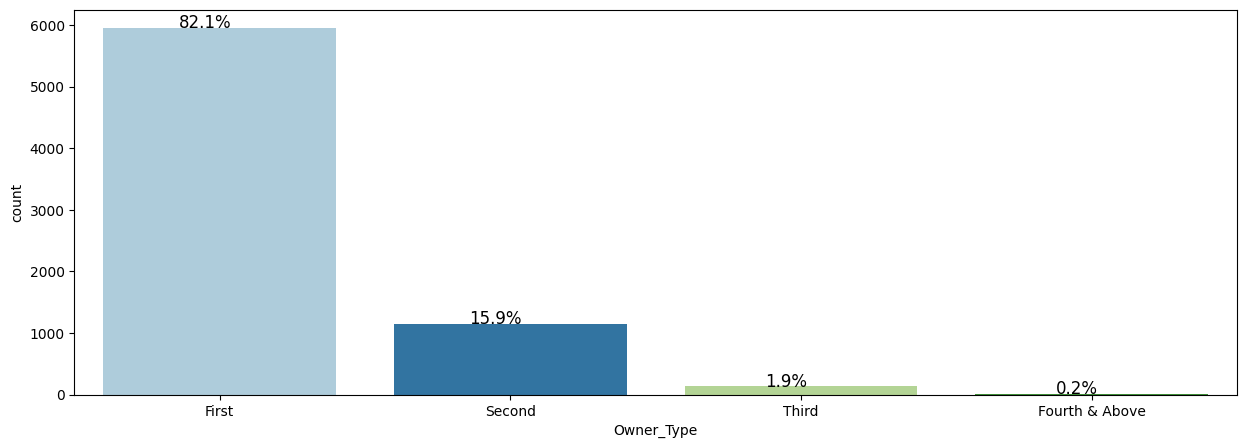

In [ ]:
# Bar Plot for 'Location'
perc_on_bar(data,'Location')

perc_on_bar(data,'Year')

perc_on_bar(data,'Fuel_Type')

perc_on_bar(data,'Transmission')

perc_on_bar(data,'Owner_Type')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

**Observations and Insights from all plots: _____**

Location: Mumbai (13.1%) is the city where most cars are.
Year: 2015 is the year of the most used cars.  It seems the used cars are more in demand as they are younger.
Fuel_type: Diesel (over 50%) is the popular and then Petrol.
Transmission: Most of cars are manual transimitted.
Owner_type: Most of cars are owned first-time owners (82.1%)

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables.

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

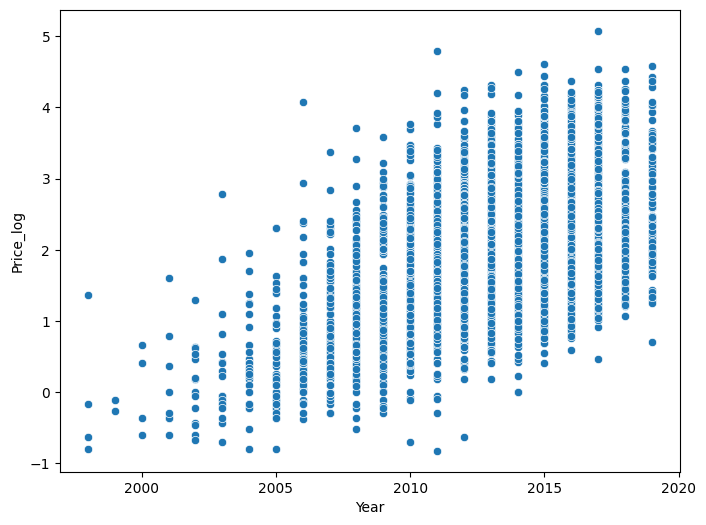

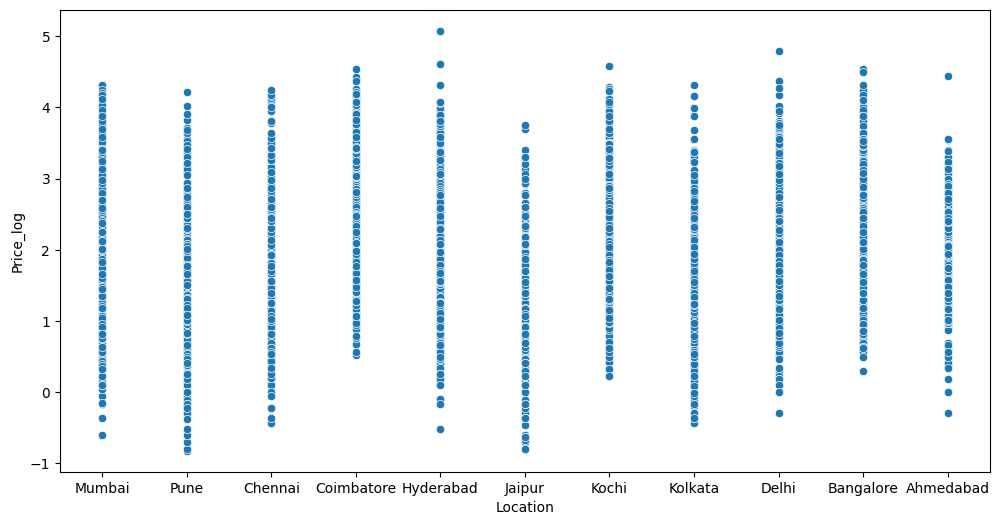

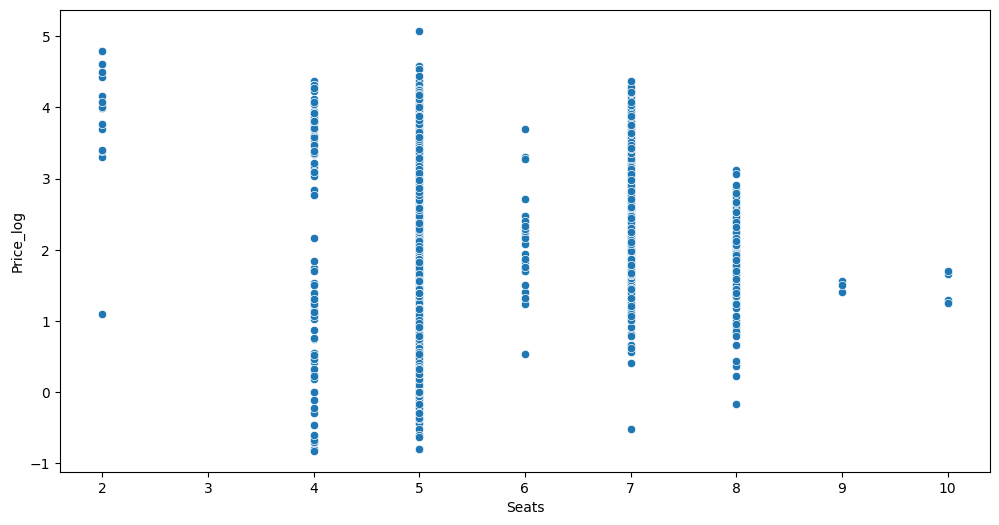

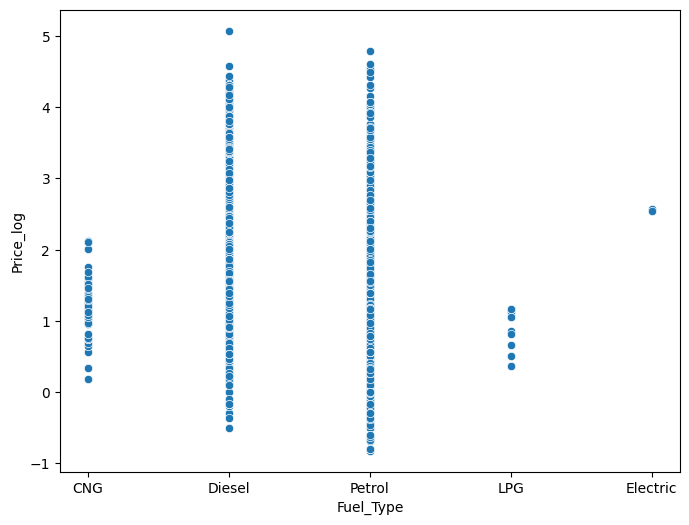

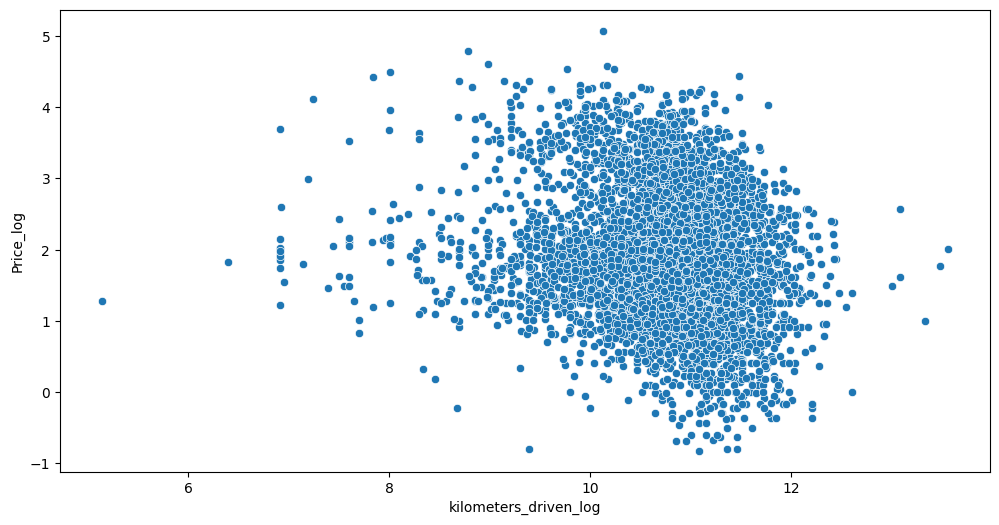

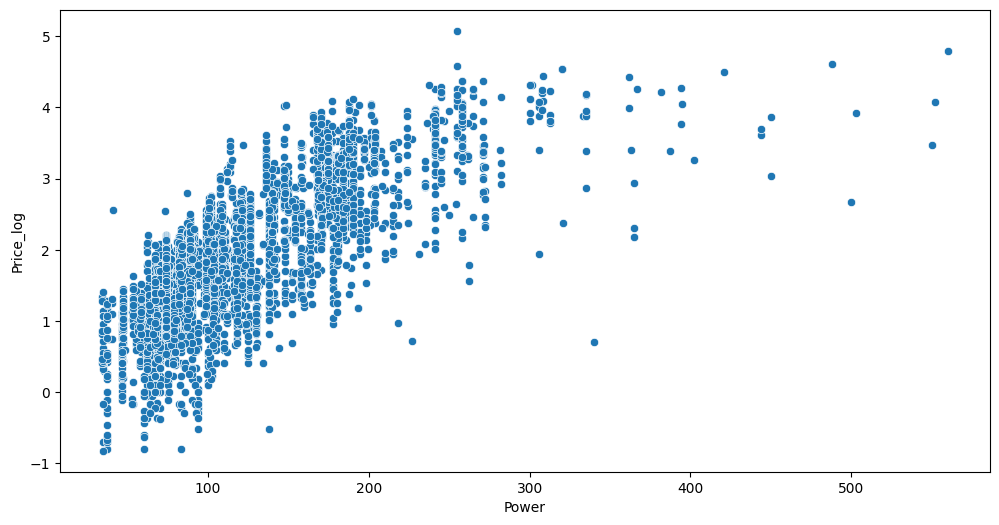

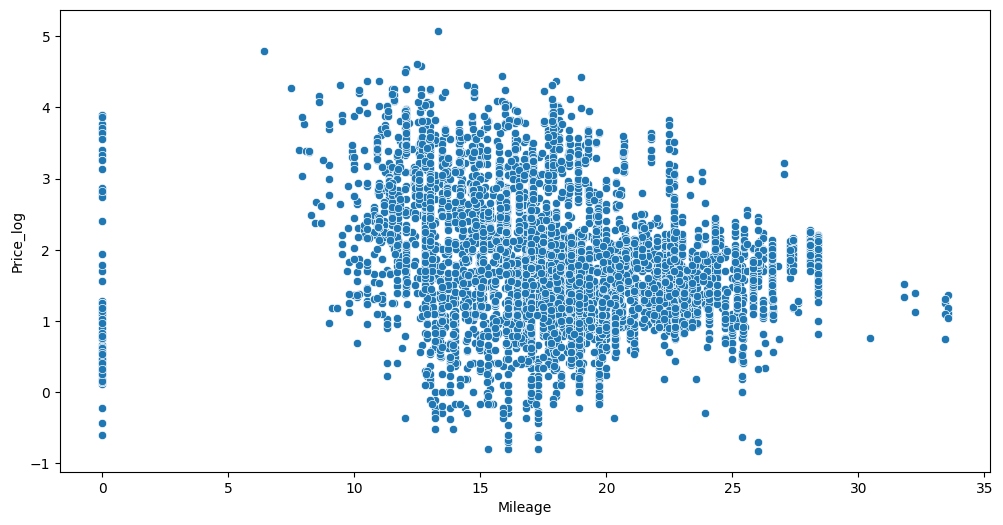

In [ ]:
# Let us plot pair plot for the variables 'year' and 'price_log'

import matplotlib.pyplot as plt
import seaborn as sns

data["Price_log"] = np.log(data["Price"])
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

plt.figure(figsize=[8, 6])
sns.scatterplot(x=data["Year"], y=data["Price_log"])
plt.show()

plt.figure(figsize=[12, 6])
sns.scatterplot(x=data["Location"], y=data["Price_log"])
plt.show()

plt.figure(figsize=[12, 6])
sns.scatterplot(x=data["Seats"], y=data["Price_log"])
plt.show()

plt.figure(figsize=[8, 6])
sns.scatterplot(x=data["Fuel_Type"], y=data["Price_log"])
plt.show()


plt.figure(figsize=[12, 6])
sns.scatterplot(x=data["kilometers_driven_log"], y=data["Price_log"])
plt.show()


plt.figure(figsize=[12, 6])
sns.scatterplot(x=data["Power"], y=data["Price_log"])
plt.show()

plt.figure(figsize=[12, 6])
sns.scatterplot(x=data["Mileage"], y=data["Price_log"])
plt.show()


<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots: _____**


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

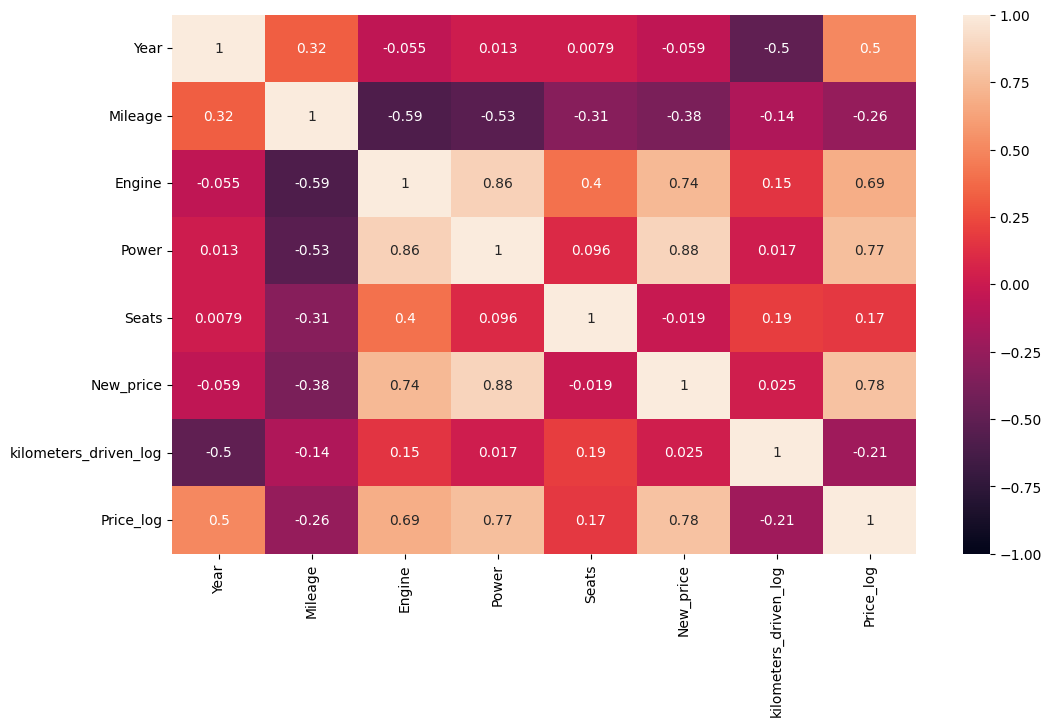

In [ ]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(columns=["Price" , "Kilometers_Driven"] , axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights: _____**

### **3. Box plot**

In [ ]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):

    plt.figure(figsize = (12, 5)) # Setting size of boxplot

    sns.boxplot(x = z, y = data['Price']) # Defining x and y

    plt.show()

    plt.figure(figsize = (12, 5))

    plt.title('Without Outliers')

    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers

    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

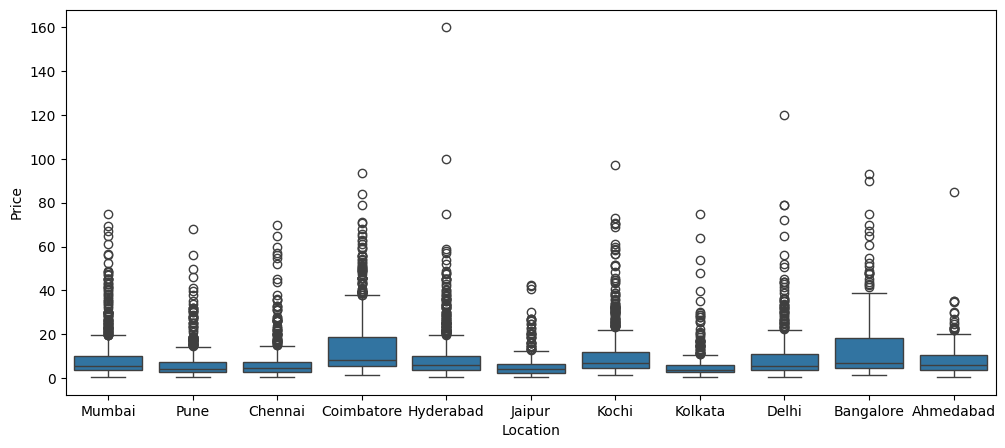

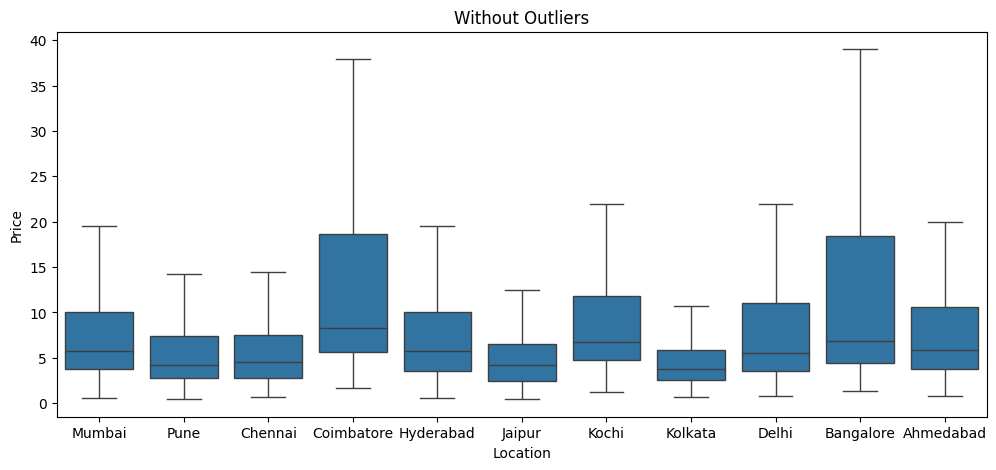

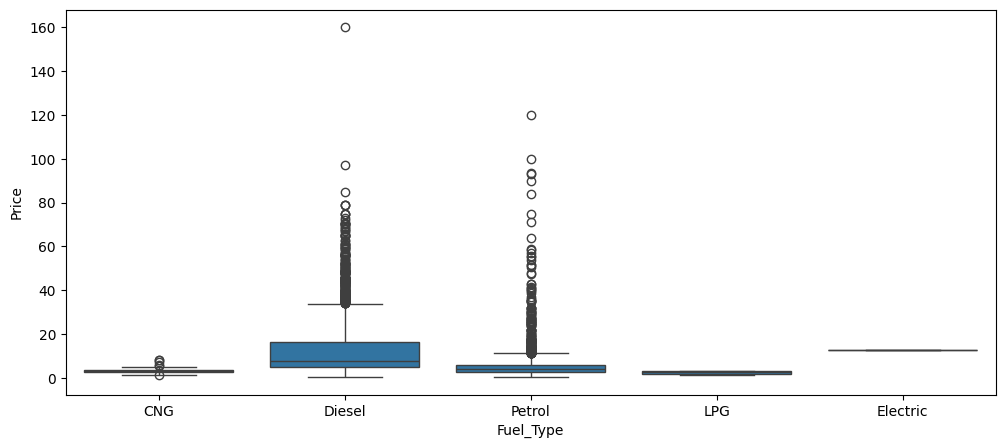

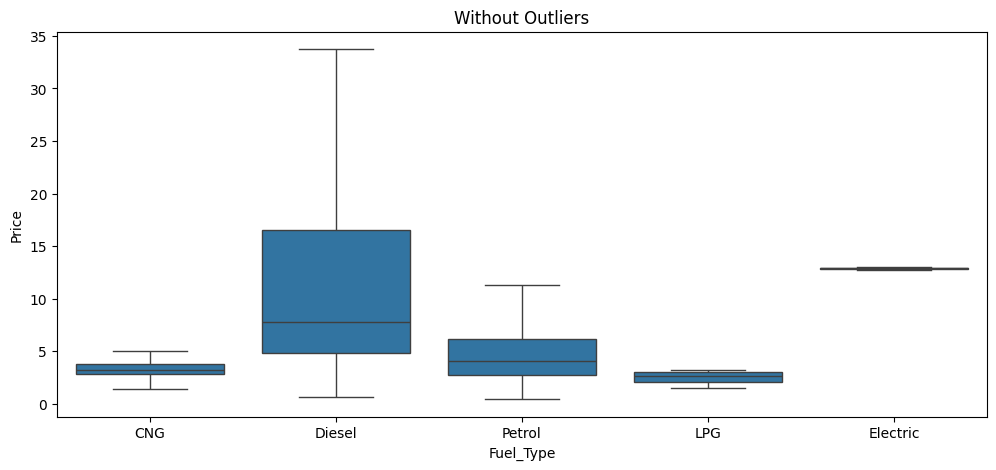

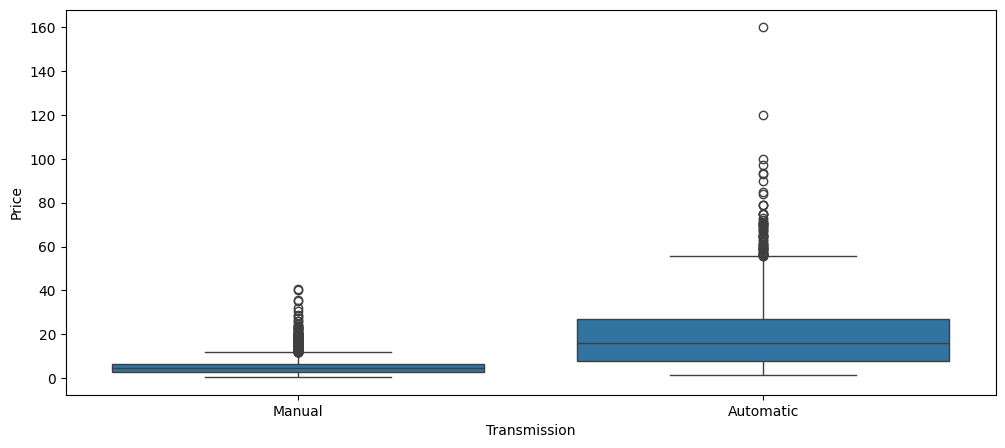

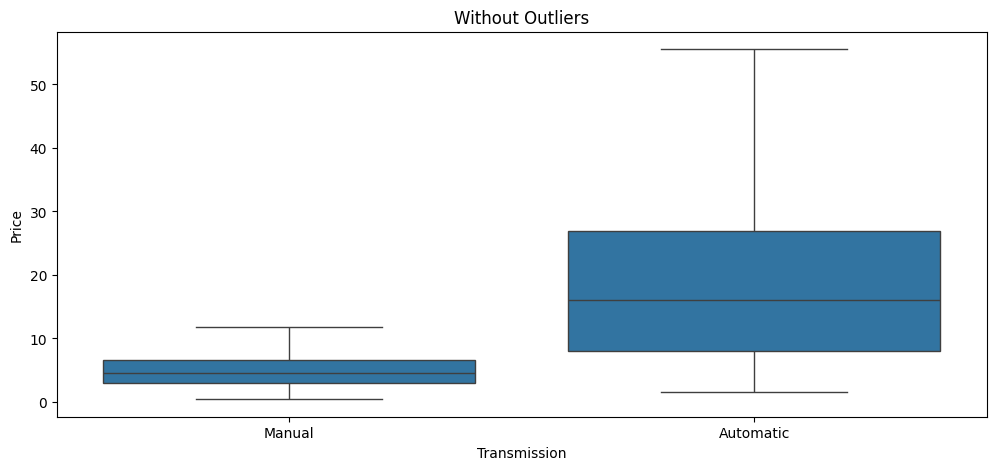

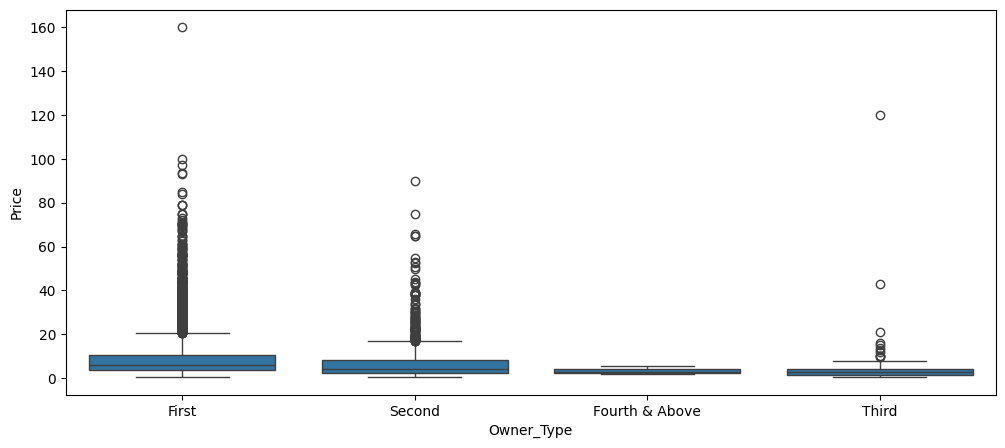

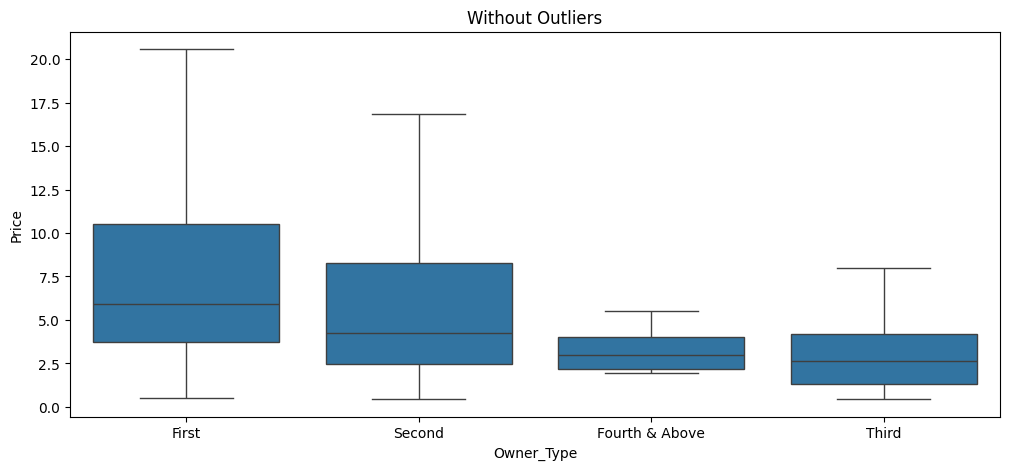

In [ ]:
# Box Plot: Price vs Location
boxplot(data['Location'])

boxplot(data['Fuel_Type'])

boxplot(data['Transmission'])

boxplot(data['Owner_Type'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:__**


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

In [ ]:
data["Name"].extract()

AttributeError: 'Series' object has no attribute 'extract'

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [ ]:
# Extract Brand Names
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

In [ ]:
# Extract Model Names
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

#### **Observations and Insights: _____**

### **Missing value treatment**

In [ ]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

#### **Observations and Insights: _____**

**Missing values in Seats**

In [ ]:
# Checking missing values in the column 'Seats'
data['Seats'].isnull().sum()

53

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [ ]:
# Impute missing values in Seats,you can use fillna method in pandas
median_seats = data['Seats'].median()
data['Seats'] = data['Seats'].fillna(median_seats)

In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Seats'].isnull().sum()

0

**Missing values for Mileage**

In [ ]:
# Now check missing values of each column. Hint: Use isnull() method
data['Mileage'].isnull().sum()

2

In [ ]:
# Impute missing Mileage. For example, use can use median or any other methods.
median_Mileage = data['Mileage'].median()
data['Mileage'] = data['Mileage'].fillna(median_Mileage)

In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Mileage'].isnull().sum()

0

**Missing values for Engine**

In [ ]:
# Impute missing values in the column Engine
median_Power = data['Engine'].median()
data['Engine'] = data['Engine'].fillna(median_Power)
data['Engine'].isnull().sum()


0

**Missing values for Power**

In [ ]:
# Impute missing values in the column Power
median_Power = data['Power'].median()
data['Power'] = data['Power'].fillna(median_Power)
data['Power'].isnull().sum()

0

**Missing values for New_price**

In [ ]:
# Impute missing values in the column New_price
data['New_price'].isnull().sum()
median_New_price = data['New_price'].median()
data['New_price'] = data['New_price'].fillna(median_New_price)
data['New_price'].isnull().sum()


0

In [ ]:
# Drop the rows where 'Price' == NaN
data['Price'].isnull().sum()
data = data.drop(data[data['Price'].isna()].index)



In [ ]:
# Check the null values in the data
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

**Observations for missing values after imputing: _____**

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

Based on the exploratory data analysis (EDA) and data preprocessing performed, some of the most important observations and insights from the data may include:

Data Distribution: Understanding the distribution of features and target variable(s) can provide insights into the underlying patterns and potential challenges in modeling the data. This includes identifying skewed distributions, outliers, and missing values.

Feature Engineering: Creating new features or transforming existing ones based on domain knowledge and insights gained from the data can improve the performance of machine learning models. This may involve encoding categorical variables, handling missing values, scaling numerical features, and extracting relevant information from text or datetime variables.

Correlation Analysis: Exploring the correlations between features and the target variable(s), as well as between pairs of features, can help identify important relationships and potential multicollinearity issues. This information can guide feature selection and model building processes.

Outlier Detection and Treatment: Identifying and handling outliers appropriately can improve the robustness and accuracy of predictive models. Depending on the context, outliers may be removed, transformed, or treated as special cases in the analysis.

Data Imbalance: Addressing class imbalance in classification tasks is essential for building models that generalize well to unseen data. Techniques such as oversampling, undersampling, or using class weights can help mitigate the effects of data imbalance.

Model Selection and Evaluation: Choosing the appropriate machine learning algorithms and evaluation metrics based on the nature of the problem and data characteristics is critical for building effective predictive models. This involves comparing the performance of different models using cross-validation and hyperparameter tuning techniques.

Interpretability: Understanding the underlying drivers of predictions and model decisions is important for gaining trust in predictive models, especially in sensitive or regulated domains. Techniques such as feature importance analysis, partial dependence plots, and model-agnostic interpretability methods can help explain the behavior of complex models.

Overall, the insights gained from EDA and data preprocessing lay the foundation for building accurate, robust, and interpretable machine learning models that effectively address the underlying problem and business objectives.







## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [ ]:
data.dtypes.value_counts()

float64    8
object     7
int64      2
dtype: int64

In [ ]:
data.select_dtypes(include ='object').columns.to_list()

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Brand',
 'Model']

In [ ]:
data.select_dtypes(include ='float64').columns.to_list()

['Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_price',
 'Price',
 'kilometers_driven_log',
 'Price_log']

In [ ]:
data.select_dtypes(include ='int64').columns.to_list()

['Year', 'Kilometers_Driven']

In [ ]:
# Step-1
X = data.drop(['Name','Price','Price_log','Kilometers_Driven','New_price'], axis = 1)

y = data["Price"]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)



In [ ]:
# Step-3 Splitting data into training and test set:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape)


(4212, 82) (1806, 82)


In [ ]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [train_r2, test_r2, train_rmse, test_rmse]

    pred_train = model.predict(X_train)

    pred_train_ = np.exp(pred_train)

    pred_test = model.predict(X_test)

    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train, pred_train_)

    test_r2 = metrics.r2_score(y_test, pred_test_)

    train_rmse = metrics.mean_squared_error(y_train, pred_train_, squared = False)

    test_rmse = metrics.mean_squared_error(y_test, pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend([train_r2, test_r2, train_rmse, test_rmse])

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:

        print("R-sqaure on training set : ", metrics.r2_score(y_train, pred_train_))

        print("R-square on test set : ", metrics.r2_score(y_test, pred_test_))

        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train, pred_train_)))

        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test, pred_test_)))

    # Returning the list with train and test scores
    return score_list

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [ ]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [ ]:
print(X_train.head())

      Year  Mileage  Engine  Power  Seats  kilometers_driven_log  \
2116  2011    19.70   796.0   46.3    5.0              11.251249   
2769  2006    15.30  1341.0   83.0    5.0              10.691945   
1518  2015    17.00  1497.0  118.0    5.0              10.373491   
3783  2010    14.42  1995.0  147.6    5.0              11.759786   
685   2012    21.10  1248.0   73.9    5.0              11.896990   

      Location_Bangalore  Location_Chennai  Location_Coimbatore  \
2116                   0                 0                    0   
2769                   1                 0                    0   
1518                   0                 0                    0   
3783                   0                 0                    0   
685                    0                 0                    0   

      Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  \
2116               0                   1                0               0   
2769               0              

In [ ]:
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

In [ ]:
print(y_train.head())

2116    2.15
2769    1.75
1518    5.50
3783    6.20
685     3.55
Name: Price, dtype: float64


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
train_r2 = r2_score(y_train, lr.predict(X_train))
test_r2 = r2_score(y_test, lr.predict(X_test))
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

In [ ]:
# Get score of the model
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming you have already trained your linear regression model 'lr'

# Calculate R^2 score for training and testing data
train_r2 = r2_score(y_train, lr.predict(X_train))
test_r2 = r2_score(y_test, lr.predict(X_test))

# Calculate RMSE for training and testing data
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

# Print the scores
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)






Training R^2 Score: 0.7836418476085718
Testing R^2 Score: 0.7807038366650906
Training RMSE: 5.1968226999476235
Testing RMSE: 5.219092019187842


**Observations from results: _____**

**Important variables of Linear Regression**

Building a model using statsmodels.

In [ ]:
# Import Statsmodels
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train1 = sm.add_constant(X_train)


# Add constant to test data
x_test1 = sm.add_constant(X_test)

def build_ols_model(train):

    # Create the model
    olsmodel1 = sm.OLS(y_train, x_train1)
    return olsmodel1.fit()

olsmodel1 = build_ols_model(x_train1)


olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     284.2
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:57:55   Log-Likelihood:                -12918.
No. Observations:                4212   AIC:                         2.594e+04
Df Residuals:                    4158   BIC:                         2.629e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [ ]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Fuel_Type_Petrol,-1.885503,3.393063e-02
Brand_land,5.801720,3.036307e-02
Model_land,5.801720,3.036307e-02
Location_Chennai,1.133011,2.403764e-02
Location_Jaipur,1.222619,1.765027e-02
Location_Kolkata,-1.546204,1.728038e-03
Mileage,-0.110879,4.115673e-04
Location_Hyderabad,1.818450,1.044427e-04
Engine,0.001829,1.520218e-05
Location_Bangalore,2.322595,1.141083e-05


In [ ]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)


start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Fuel_Type', 'Brand', 'Model', 'Location', 'Mileage', 'Engine', 'kilometers_driven_log', 'Power', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
# Import Ridge/ Lasso Regression from sklearnfrom sklearn.

from sklearn.linear_model import Ridge, Lasso


In [ ]:
# Create a Ridge regression model
ridge_model = Ridge()


In [ ]:
# Fit Ridge regression model
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Get score of the model
train_score = ridge_model.score(X_train, y_train)
test_score = ridge_model.score(X_test, y_test)

print("train score", train_score)
print("test score", test_score)

train score 0.7826581948493815
test score 0.7798827154329613


**Observations from results: _____**

### **Decision Tree**

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [ ]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state=1)


In [ ]:
# Fit decision tree regression model
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
def get_model_score(model, X, y):
    """
    Function to get the R^2 score of a model.

    Parameters:
    - model: The trained regression model
    - X: The feature matrix
    - y: The target vector

    Returns:
    - The R^2 score of the model
    """
    # Get the R^2 score of the model
    score = model.score(X, y)
    return score

# Use the function to get the score of the Decision Tree regression model
dtree_model_score = get_model_score(dtree, X_test, y_test)
print("Decision Tree Model Score:", dtree_model_score)


NameError: name 'dtree' is not defined

In [ ]:
# Get score of the model
dtree_model = get_model_score(dtree, X_test, y_test)
print(dtree_model_score)


TypeError: get_model_score() missing 2 required positional arguments: 'X_test' and 'y_test'

**Observations from results: _____**

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.651129
Year                   0.147497
kilometers_driven_log  0.066677
Engine                 0.039205
Mileage                0.021569
...                         ...
Model_smart            0.000000
Brand_datsun           0.000000
Brand_smart            0.000000
Brand_jeep             0.000000
Brand_lamborghini      0.000000

[82 rows x 1 columns]


**Observations and insights: _____**

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a Randomforest regression
random_forest_model = RandomForestRegressor()

In [ ]:
# Fit Randomforest regression model
random_forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Get score of the model
random_forest_model_score = random_forest_model.score(X_test, y_test)
print("Random Forest Model Score:", random_forest_model_score)


Random Forest Model Score: 0.8763387517971644


**Observations and insights:



**Feature Importance**

In [ ]:
# Print important features similar to decision trees
# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Get the indices of the features sorted by importance
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. Feature: {X_train.columns[idx]}, Importance: {feature_importances[idx]}")


Feature Importances:
1. Feature: Power, Importance: 0.6609558490442519
2. Feature: Year, Importance: 0.15717032786404136
3. Feature: kilometers_driven_log, Importance: 0.05683422189078584
4. Feature: Engine, Importance: 0.03279542006180043
5. Feature: Mileage, Importance: 0.019146964853375248
6. Feature: Brand_land, Importance: 0.006396951103631595
7. Feature: Transmission_Manual, Importance: 0.006184111793595249
8. Feature: Model_land, Importance: 0.00582068565815387
9. Feature: Seats, Importance: 0.005242792062105826
10. Feature: Model_mercedes-benz, Importance: 0.00290361250720572
11. Feature: Brand_mercedes-benz, Importance: 0.0026147951376543047
12. Feature: Location_Hyderabad, Importance: 0.0024044171656464886
13. Feature: Model_mini, Importance: 0.0023820195707757886
14. Feature: Brand_mini, Importance: 0.002220134448182707
15. Feature: Location_Coimbatore, Importance: 0.002065226780739035
16. Feature: Location_Mumbai, Importance: 0.002037844266121336
17. Feature: Location_Banga

**Observations and insights: _____**

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Choose the type of estimator
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Type of scoring used to compare parameter combinations
scoring = 'neg_mean_squared_error'  # You can change this to other scoring metrics

# Run the grid search
grid_search = GridSearchCV(estimator=dtree_tuned, param_grid=param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dtree = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Fit the best algorithm to the data
best_dtree.fit(X_train, y_train)






Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeRegressor(min_samples_split=10, random_state=1)

In [ ]:
# Get the score of the model
train_score = best_dtree.score(X_train, y_train)
test_score = best_dtree.score(X_test, y_test)

print("Training Score:", train_score)
print("Test Score:", test_score)


Training Score: 0.9739132935597917
Test Score: 0.7667795074359196


**Observations and insights: _____**

**Feature Importance**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit the decision tree regressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

# Print the depth of the tree
print("Tree depth:", dtree.get_depth())

# Print the number of leaves in the tree
print("Number of leaves:", dtree.get_n_leaves())

# Print the feature importances
print("Feature importances:")
for feature, importance in zip(["Power","Year","kilometers_driven_log","Engine","Mileage","Brand_land","Transmission","Model_land","Seats"], dtree.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Tree depth: 35
Number of leaves: 4032
Feature importances:
Power: 0.1546
Year: 0.0213
kilometers_driven_log: 0.0384
Engine: 0.6516
Mileage: 0.0025
Brand_land: 0.0667
Transmission: 0.0032
Model_land: 0.0003
Seats: 0.0029


**Observations and insights: _____**

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Choose the type of Regressor

# Define the parameters for Grid to choose from

# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations

# Run the grid search

# Set the model to the best combination of parameters

# Fit the best algorithm to the data

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # You can choose any regressor you want to tune

# Choose the type of Regressor
regressor = RandomForestRegressor()  # Change this to the regressor you want to tune

# Define the parameters for Grid to choose from
param_grid = {
    'n_estimators': [50, 100, 200],  # Example values for n_estimators
    'max_depth': [None, 5, 10, 20],   # Example values for max_depth
    # Add more parameters and values to explore
}

# Type of scoring used to compare parameter combinations
scoring = 'neg_mean_squared_error'  # You can change this to other scoring metrics

# Run the grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train)

# Set the model to the best combination of parameters
best_regressor = grid_search.best_estimator_

# Fit the best algorithm to the data
best_regressor.fit(X_train, y_train)

# Optionally, you can print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
# Get score of the model
train_score = best_regressor.score(X_train, y_train)
test_score = best_regressor.score(X_test, y_test)
print("Training Score:", train_score)
print("Test Score:", test_score)

Training Score: 0.9841755251804084
Test Score: 0.8700583384703185


**Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees

from sklearn.ensemble import RandomForestRegressor

# Assuming you already have tuned your RandomForestRegressor and stored the best model in best_regressor
# Fit the best RandomForestRegressor model to the data
best_regressor.fit(X_train, y_train)

# Print the feature importances
print("Feature importances:")
for feature, importance in zip(["Power","Year","kilometers_driven_log","Engine","Mileage","Brand_land","Transmission","Model_land","Seats"], best_regressor.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Feature importances:
Power: 0.1526
Year: 0.0185
kilometers_driven_log: 0.0326
Engine: 0.6628
Mileage: 0.0051
Brand_land: 0.0604
Transmission: 0.0018
Model_land: 0.0010
Seats: 0.0021


**Observations and insights: ______**

**Observations: _____**

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [ ]:
def get_model_score(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R2 scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    return r2_train, r2_test, rmse_train, rmse_test




In [ ]:
# Define lists to store performance metrics
models = [lr, dtree, random_forest_model, ridge_model]
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Loop through each model
for model in models:
    # Compute R2 scores and RMSE values for each model
    r2_train_score, r2_test_score, rmse_train_score, rmse_test_score = get_model_score(model, X_train, y_train, X_test, y_test)

    # Append the scores to the respective lists
    r2_train.append(r2_train_score)
    r2_test.append(r2_test_score)
    rmse_train.append(rmse_train_score)
    rmse_test.append(rmse_test_score)


In [ ]:
import pandas as pd

# Assuming you have already defined r2_train, r2_test, rmse_train, rmse_test lists

# Creating the DataFrame
comparison_frame = pd.DataFrame({'Model':['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge Model'],
                                 'Train_r2': r2_train,
                                 'Test_r2': r2_test,
                                 'Train_RMSE': rmse_train,
                                 'Test_RMSE': rmse_test
})

# Displaying the DataFrame
print(comparison_frame)


               Model  Train_r2   Test_r2  Train_RMSE  Test_RMSE
0  Linear Regression  0.783642  0.780704    5.196823   5.219092
1      Decision Tree  0.999997  0.752106    0.020681   5.548974
2      Random Forest  0.985697  0.877701    1.336200   3.897545
3        Ridge Model  0.782658  0.779883    5.208623   5.228854


In [ ]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','Ridge Model'],
                               'Train_r2': r2_train,'Test_r2': r2_test,
                               'Train_RMSE': rmse_train,'Test_RMSE': rmse_test})
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.783642,0.780704,5.196823,5.219092
1,Decision Tree,0.999997,0.752106,0.020681,5.548974
2,Random Forest,0.985697,0.877701,1.336200,3.897545
3,Ridge Model,0.782658,0.779883,5.208623,5.228854


**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt? What are expected benefits and costs (assume numbers) of this solution design?